<a href="https://colab.research.google.com/github/farieu/data-analysis/blob/TreinamentoModelo/TreinamentoRegressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Treinamento com Regressão Logística

### Importação de bibliotecas e dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Binarizer, LabelEncoder, MultiLabelBinarizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [3]:
df = pd.read_csv('/content/drive/MyDrive/BackEnd/Treinamento/GoodReadsEncoded.csv')

### Treinamento

Com o dataset codificado, começo a preparar o treinamento:
dividindo o conjunto em características (features), através

1.   Dividindo o conjunto em X e y
2.  **X**: características/variáveis independentes, que vão servir como entrada para o modelo.
3. **Y**: variável dependente que o modelo está tentando prever, ou seja, a nota do livro.




In [4]:
X = df.drop(columns=['rating', 'desc'])
y = df['rating']

In [5]:
print(X.columns)
print(X.head(2))

Index(['author', 'bookformat', 'pages', 'reviews', 'title', 'totalratings',
       '10th Century', '11th Century', '12th Century', '13th Century',
       ...
       'Young Adult Paranormal', 'Young Adult Romance',
       'Young Adult Science Fiction', 'Young Readers', 'Yuri', 'Zambia', 'Zen',
       'Zimbabwe', 'Zombies', 'æ¼«ç”»'],
      dtype='object', length=1185)
   author  bookformat  pages  reviews  title  totalratings  10th Century  \
0   32032          56      0        5   8698            33             0   
1    8446         100    576        6  21651            41             0   

   11th Century  12th Century  13th Century  ...  Young Adult Paranormal  \
0             0             0             0  ...                       0   
1             0             0             0  ...                       0   

   Young Adult Romance  Young Adult Science Fiction  Young Readers  Yuri  \
0                    0                            0              0     0   
1                   

In [6]:
print(y)
print(y.head(3))

0        3.52
1        4.51
2        4.15
3        3.83
4        3.73
         ... 
84049    3.77
84050    3.97
84051    4.27
84052    3.63
84053    3.83
Name: rating, Length: 84054, dtype: float64
0    3.52
1    4.51
2    4.15
Name: rating, dtype: float64


Conforme mostrado na Preparação do Modelo, precisamos binarizar as notas para treinamento.



*   Avaliações de livros maior ou igual a 4 serão categorizadas como '1' (boa avaliação).
*   Avaliações menores que 4 serão categorizadas como '0' (má avaliação)



In [7]:
binarizer = Binarizer(threshold=4.0)
y_binary = binarizer.fit_transform(y.values.reshape(-1, 1)).ravel()
print(y_binary)

[0. 1. 1. ... 1. 0. 0.]


Agora, precisamos separar os conjuntos de treino e de teste. Para a **Regressão Logística**, será divido em:

1.   **80% para Treinamento**
2.   **20% para Teste**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

Instânciamento e treinamento do modelo de RL

In [9]:
logistic_regressor = LogisticRegression()
logistic_regressor.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

O modelo, a priori, parou de convergir devido a ter atingido o número máximo de iterações (por default é 100).

Aplicação do RL no conjunto de testes.

In [10]:
y_pred = logistic_regressor.predict(X_test)

Para finalizar, crio as métricas de avaliação do modelo, para compararmos na feature de [AvaliacaoModeloRL](https://github.com/farieu/data-analysis/tree/AvaliacaoModeloRL).

Acurácia do modelo: 0.63

Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       0.63      0.97      0.76     10380
         1.0       0.62      0.09      0.16      6431

    accuracy                           0.63     16811
   macro avg       0.63      0.53      0.46     16811
weighted avg       0.63      0.63      0.53     16811


Matriz de Confusão:
 [[10027   353]
 [ 5856   575]]


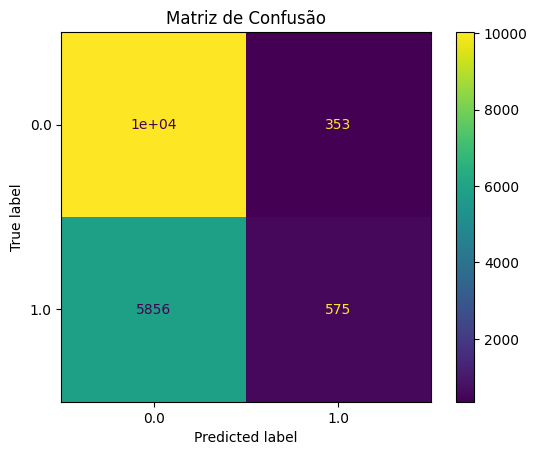

In [11]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.2f}")
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Matriz de Confusão")
plt.show()

### Plotando a probabilidade do primeiro teste.

Com o modelo já treinado, vou plotar a probabilidade de um livro estar na classe 1 (referente a nota >= 4), considerando-a como boa avaliação.

[[0.64596297 0.35403703]
 [0.63514306 0.36485694]
 [0.61560253 0.38439747]
 ...
 [0.5548985  0.4451015 ]
 [0.59193479 0.40806521]
 [0.62392041 0.37607959]]


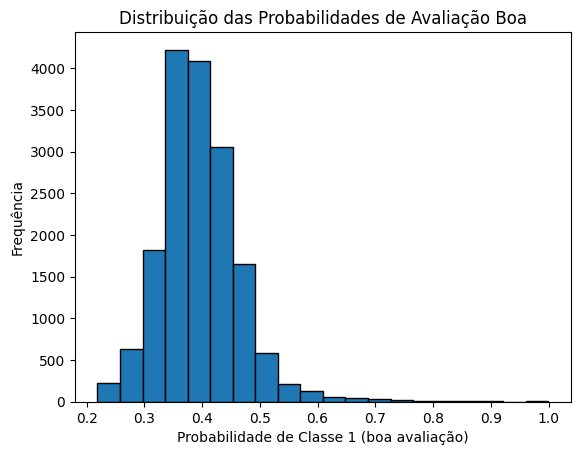

In [12]:
y_proba = logistic_regressor.predict_proba(X_test)

print(y_proba) # A saída será um array com as probabilidades para as classes 0 e 1.

probs_class_1 = y_proba[:, 1]

plt.hist(probs_class_1, bins=20, edgecolor='k')
plt.xlabel('Probabilidade de Classe 1 (boa avaliação)')
plt.ylabel('Frequência')
plt.title('Distribuição das Probabilidades de Avaliação Boa')
plt.show()

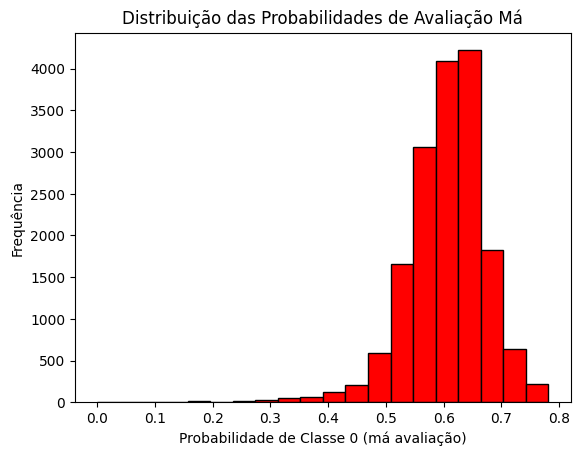

In [13]:
probs_class_0 = y_proba[:, 0]

plt.hist(probs_class_0, bins=20, edgecolor='k', color='red')
plt.xlabel('Probabilidade de Classe 0 (má avaliação)')
plt.ylabel('Frequência')
plt.title('Distribuição das Probabilidades de Avaliação Má')
plt.show()

### Testando outros parâmetros para o RL

Nessa cédula, vou tentar ajustar alguns parâmetros do modelo para ver se a acurácia melhora.



*   Binarização (nota que define o que é uma avaliação boa/avaliação ruim)
*   Iterações (para ver se atingiu o máximo de convergência com o default, ou se dá para melhorar)





---
**Regressão com 500 iterações**


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Acurácia do modelo: 0.67

Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       0.68      0.86      0.76     10380
         1.0       0.62      0.35      0.45      6431

    accuracy                           0.67     16811
   macro avg       0.65      0.61      0.60     16811
weighted avg       0.66      0.67      0.64     16811


Matriz de Confusão:
 [[8967 1413]
 [4173 2258]]


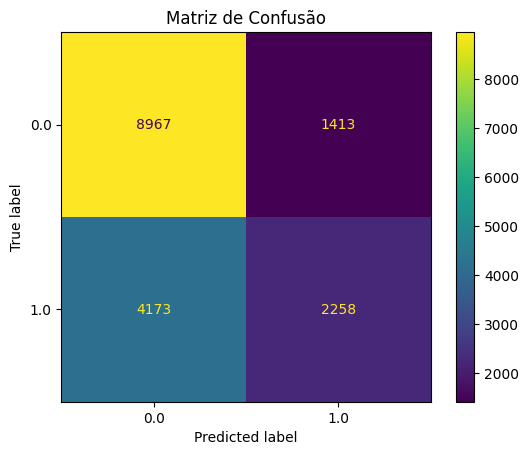

In [14]:
logistic_regressor = LogisticRegression(max_iter=500)
logistic_regressor.fit(X_train, y_train)

y_pred = logistic_regressor.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.2f}")
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Matriz de Confusão")
plt.show()



---
**Regressão com 1000 iterações**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Acurácia do modelo: 0.67

Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       0.69      0.86      0.77     10380
         1.0       0.62      0.37      0.46      6431

    accuracy                           0.67     16811
   macro avg       0.66      0.61      0.61     16811
weighted avg       0.66      0.67      0.65     16811


Matriz de Confusão:
 [[8948 1432]
 [4065 2366]]


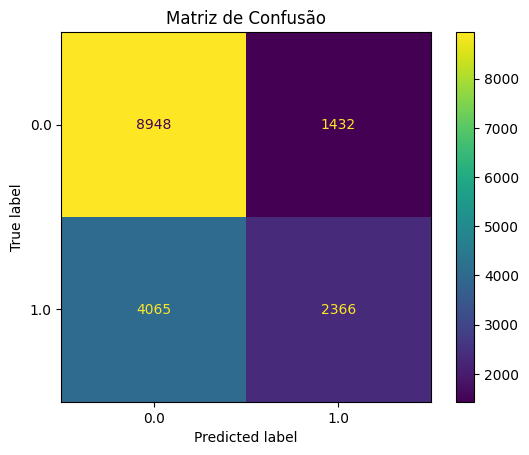

In [15]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
logistic_regressor = LogisticRegression(max_iter=1000)
logistic_regressor.fit(X_train, y_train)

y_pred = logistic_regressor.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.2f}")
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Matriz de Confusão")
plt.show()



---
**Regressão com 500 iterações e nota 3.5**


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Acurácia do modelo: 0.88

Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       0.52      0.03      0.05      2043
         1.0       0.88      1.00      0.94     14768

    accuracy                           0.88     16811
   macro avg       0.70      0.51      0.49     16811
weighted avg       0.84      0.88      0.83     16811


Matriz de Confusão:
 [[   53  1990]
 [   48 14720]]


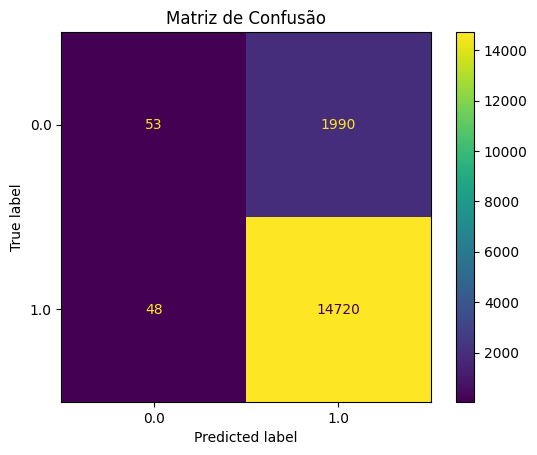

In [16]:
binarizer = Binarizer(threshold=3.5)
y_binary = binarizer.fit_transform(y.values.reshape(-1, 1)).ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

logistic_regressor = LogisticRegression(max_iter=500)
logistic_regressor.fit(X_train, y_train)

y_pred = logistic_regressor.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.2f}")
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Matriz de Confusão")
plt.show()